In [1]:
import pandas as pd

#Create usefull dataframe
weather_steps = pd.read_csv("steps_weather_combined.csv")
New_steps = weather_steps[['start', 'steps']]
New_weather = weather_steps.iloc[:, 7:35]
New_weather_steps = pd.concat([New_steps, New_weather], axis=1)

#Create new column with steps as integers
New_weather_steps["int_steps"] = New_weather_steps["steps"].astype(int)

display(New_weather_steps)

,start,steps,direction_wind,windspeed_avg_hour,windspeed_avg_10min,max_wind_gust,temp_celsius,temp_min_6h,temp_dewpoint,sunshine_duration,...,cloud_cover,relative_humidity,weather_code,indicator_present_weather_code,fog,rain,snow,thunder,ice_formation,int_steps
0,2023-01-01 00:00:00,0.000000,220.0,110.0,130.0,200.0,142.0,NaN,84.0,0.0,...,8.0,68.0,NaN,5,0.0,0.0,0.0,0.0,0.0,0
1,2023-01-01 00:10:00,97.054054,220.0,110.0,130.0,200.0,142.0,NaN,84.0,0.0,...,8.0,68.0,NaN,5,0.0,0.0,0.0,0.0,0.0,97
2,2023-01-01 00:20:00,94.945946,220.0,110.0,130.0,200.0,142.0,NaN,84.0,0.0,...,8.0,68.0,NaN,5,0.0,0.0,0.0,0.0,0.0,94
3,2023-01-01 00:30:00,0.000000,220.0,110.0,130.0,200.0,142.0,NaN,84.0,0.0,...,8.0,68.0,NaN,5,0.0,0.0,0.0,0.0,0.0,0
4,2023-01-01 00:40:00,46.876667,220.0,110.0,130.0,200.0,142.0,NaN,84.0,0.0,...,8.0,68.0,NaN,5,0.0,0.0,0.0,0.0,0.0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22460,2023-06-05 23:20:00,0.000000,10.0,60.0,60.0,80.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,0
22461,2023-06-05 23:30:00,0.000000,10.0,60.0,60.0,80.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,0
22462,2023-06-05 23:40:00,0.000000,10.0,60.0,60.0,80.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,0
22463,2023-06-05 23:50:00,0.000000,10.0,60.0,60.0,80.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,0


In [89]:
print(New_weather_steps.isna().sum())

start                                 0
steps                                 0
direction_wind                      534
windspeed_avg_hour                  534
windspeed_avg_10min                 534
max_wind_gust                       534
temp_celsius                       6432
temp_min_6h                       19723
temp_dewpoint                      6432
sunshine_duration                  7326
glob_radiation                     7326
precipitation_duration             6834
precipitation_amount_hourly        6834
air_pressure                      11215
horizontal_visibility             10813
cloud_cover                       13123
relative_humidity                  6432
weather_code                      17977
indicator_present_weather_code        0
fog                               10813
rain                              10813
snow                              10813
thunder                           10813
ice_formation                     10813
int_steps                             0


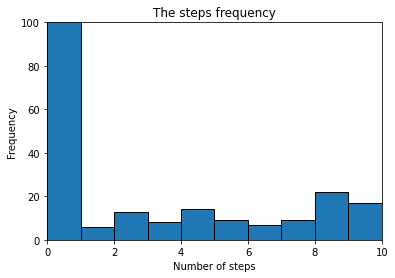

In [90]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

data = New_weather_steps['int_steps']
bin_width = 1

# Calculate the bin edges
bin_edges = np.arange(min(data), max(data) + bin_width, bin_width)

ax.hist(data, bins=bin_edges, edgecolor='black')

# Set x-axis and y-axis labels
ax.set_xlabel('Number of steps')
ax.set_ylabel('Frequency')

# Set the title of the plot
ax.set_title('The steps frequency')
ax.set_xlim(0, 10)
ax.set_ylim(0, 100)

plt.show()

In [92]:
#frequency of number of steps
print(len(New_weather_steps[New_weather_steps['steps']<=0]))
print(len(New_weather_steps[New_weather_steps['steps']<=600])- len(New_weather_steps[New_weather_steps['steps']<=500]))

21304
19


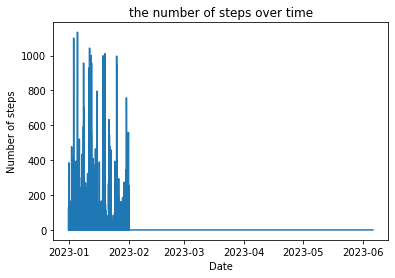

In [96]:
#Heel vaag. Eerst deed hij het wel goed (degene in overleaf), maar nu geeft hij een hele gekke grafiek

dates = New_weather_steps['start']
values = New_weather_steps['steps']

fig, ax = plt.subplots()
ax.plot(dates, values)

# Set the number of desired ticks
num_ticks = 50

# Calculate the step size to evenly distribute the ticks
step = len(dates) // (num_ticks - 1)

ax.set_xlabel('Date')
ax.set_ylabel('Number of steps')
ax.set_title('the number of steps over time')


plt.show()

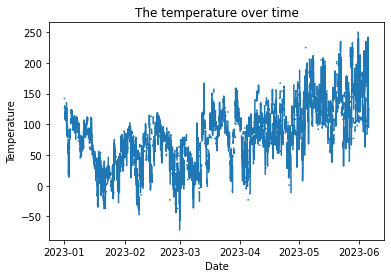

In [94]:
# Convert 'startDate' column to datetime objects
New_weather_steps['start'] = pd.to_datetime(New_weather_steps['start'])

dates = New_weather_steps['start']
values = New_weather_steps['temp_celsius']

fig, ax = plt.subplots()
ax.plot(dates, values)

# Set the number of desired ticks
num_ticks = 5

# Calculate the step size to evenly distribute the ticks
step = len(dates) // (num_ticks - 1)

ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
ax.set_title('The temperature over time')


plt.show()

In [95]:
#Ik dacht misschien iets met pearson's correlation test, dus deze functie had ik uit de Python3Code gehaald. 
#Hij moet nog aangepast worden op onze set
from scipy.stats import pearsonr
from operator import itemgetter
import numpy as np

def pearson_selection(max_features, X_train, y_train):
    correlations = []
    full_columns_and_corr = []
    abs_columns_and_corr = []

    # Compute the absolute correlations per column.
    for i in range(0, len(X_train.columns)):
        corr, p = pearsonr(X_train[X_train.columns[i]], y_train)
        correlations.append(abs(corr))
        if np.isfinite(corr):
            full_columns_and_corr.append((X_train.columns[i], corr))
            abs_columns_and_corr.append((X_train.columns[i], abs(corr)))

    sorted_attributes = sorted(abs_columns_and_corr,key=itemgetter(1), reverse=True)
    res_list = [x[0] for x in sorted_attributes[0:max_features]]

    # And return the most correlated ones.
    return res_list, sorted(full_columns_and_corr,key=itemgetter(1), reverse=True)

In [2]:
New_weather_steps.to_csv('New_weather_steps.csv')